In [ ]:
#%%

import pandas as pd
from transformers import pipeline
import matplotlib.pyplot as plt

In [ ]:
#%% Funcion para pasar de un formato diccionario a uno df (Hecha por Dani L.)

def huggingface_output_2_df(output_dict, add_to_col_names = None):
	feature_names = [n.get('label') for n in output_dict[0]]
	if add_to_col_names:
		feature_names = [add_to_col_names+n for n in feature_names]
	feature_vectors = []
	for doc in output_dict:
		feature_vectors_doc = []
		for feature in doc:
			feature_vectors_doc.append(feature.get('score'))
		feature_vectors.append(feature_vectors_doc)
	feature_vectors = pd.DataFrame(feature_vectors, columns = feature_names)
	return feature_vectors


def analyze_transcripts_by_sentences(transcripts, sentiment_pipeline, title=""):
    """
    Realiza análisis de sentimiento para cada oración (separada por '.')
    de cada transcript. Devuelve un DataFrame con los scores de cada oración,
    e imprime además un gráfico de la evolución de puntajes para cada transcript.
    """

    # Estructura donde guardaremos todos los resultados
    all_results = []

    # Recorremos cada transcript
    for idx, transcript in enumerate(transcripts, start=1):
        
        # 1) Separamos en oraciones (podemos refinar con split('.') o re.split)
        sentences = transcript.split(".")

        # 2) Aplicamos el pipeline a la lista de oraciones
        output_dict = sentiment_pipeline(sentences, return_all_scores=True)

        # 3) Convertimos a DataFrame
        df_sentences = huggingface_output_2_df(output_dict, add_to_col_names='sentiment_')
        
        # Agregamos algunas columnas informativas
        df_sentences["transcript_id"] = idx
        df_sentences["sentence"] = sentences
        df_sentences["sentence_id"] = range(1, len(sentences) + 1)

        # Guardamos
        all_results.append(df_sentences)
        
        # 4) Graficamos la evolución de POSITIVE y NEGATIVE a lo largo de las oraciones
        plt.figure(figsize=(8, 4))
        plt.plot(df_sentences["sentence_id"], df_sentences["sentiment_POSITIVE"],linestyle="--",marker="o", label='POSITIVE')
        plt.plot(df_sentences["sentence_id"], df_sentences["sentiment_NEGATIVE"],linestyle="--",marker="o", label='NEGATIVE')
        plt.title(f"Evolución del sentimiento en el Transcript {idx} {title}")
        plt.xlabel("Oración")
        plt.ylabel("Score")
        plt.legend()
        plt.show()

    # Unimos todo en un único DataFrame si hiciera falta
    final_df = pd.concat(all_results, ignore_index=True)
    return final_df

In [ ]:
#%% Reportes de 1 sujeto (Sacado de Tomi D.)

positive_transcripts = ["Well, at the beginning there is a scene where we are shown swimming underwater, which can be relaxing but also very boring because nothing much happens. I get bored because nothing interesting happens. Then the baby giraffe and the adult giraffe appear, which I find very cute and funny. The same happens when other animals like the elephant appear; especially when there is an elephant I find it very cute and funny. At the end, the camera goes back underwater and I think it focuses on a stingray or a manta ray. But the same thing happens to me as in the beginning: although it's relaxing, I also get a little bored and lose attention because nothing happens in the video. So I don't know, I get bored and it doesn't generate as much excitement as a giraffe.",
    "Well, the beginning is relaxing because you're watching the tent, there's no salt and you meet your friends. Then they go to a party which is a bit more lively, people are jumping and I find it fun. Then it gets dark, you start to see more people and everyone goes to the party. It's already like a “what's going on?” kind of party. I think it gets too out of control. I like to be in places when it's daylight, but hey, everyone is very happy and euphoric, so good for them. Although it looks like they got high too. It doesn't generate a negative emotion for me, more like it amuses me and I find people's reaction amusing.",
    "Well, you see a badge with people enjoying themselves, all very relaxing. Then it becomes a bit dizzying because the image shows people in a kind of canoe or raft on a fast river, which looks dirty, like muddy. There they go with the raft, and at the end they are happy, which makes me happy too because it looks like they survived. Then a mountain is shown, which doesn't generate anything for me because it's just a mountain",
    "Well, it looks fantastic, very relaxing, the water is clear, the sun is shining. Then it can be a little disturbing when a figure or a dog appears, but it doesn't look angry, so it's not very intimidating. The whole scene with the fish seems soothing and creates a sense of calmness for me.",
    "Well, there are two people surfing and the second person gives me a bit of a laugh because his hair is combed and he looks like he's not wet. In general, the whole scene is joyful to me because the people are enjoying themselves so much. Seeing someone doing something they love so much gives me a sense of joy. Also, it looks fun and the whole video, along with the music, gives me the feeling that it's something enjoyable and fun.",
    "The world of sofandas is a place where there is home or the narwhal and sofandas. At first it gives me a little bit of a shock because something falls down and I think 'please let it not be broken', but it looks fluffy, so I don't think it's broken very hard. Then they show a fun city and there are go-karts, which I also find fun and relaxing. Then not much else happens, they just show some buildings and a little dock, but it doesn't generate any excitement for me anymore. It's relaxing but I get a little bored.",
    "Are you up for it? Yes. And I've certainly got the box car. I don't know, and it's started turning me around and I find it, throughout the video, super fun. It generated a sense of vertigo-type euphoria for me, but in a good way. I find it super fun, but it's not me. It's euphoric fun. And then at the end, nothing, I find it funny how it spins the car with less. I would recommend watching it in first person. Even though he imagines me with all the euphoria."]


negative_transcripts = ["What do you mean you counted yourself there? Well, I find it very relaxing to drive around that place, but I get angry when they take out their cell phones because they shouldn't do it while driving. Also, I find the women's voices annoying, they sound stupid and clearly you can't trust someone who drives like that. It also bothers me that he drives badly because driving fast on a road that is not safe is dangerous. It's obvious they're going to crash, right? Because that's the point of the video. At one point it looks like they don't crash and that gives a little bit of relief, going back to being relaxing. But then I don't know what happens, like the light goes out, I guess someone disturbs from behind and they end up colliding with a tractor. That surprises me because I thought the danger had passed, but no, they hit the tractor. I was a little amused and sorry because the noise they make is funny but the person is on the windshield and may be dead. I don't think he deserves that much, but oh well.",
    "What's the way? When do you want to start? Are you okay? Are you okay? She doesn't let me know she's with him. She's fine, but okay. Then at the beginning you see the person in the water with the waves coming in and it looks to me like she's dead, which is sad. Not so much though, because if he got on a plane to shoot people, I mean, that's part of the job, it's not normal to get dropped. So I don't get that bad either. But hey, it's not that funny of a scene either. And then you see the plane in first person and the same thing, it scares me a little bit, but also like, well, these are things that happen in war. Clearly, the person knew what he was exposed to, so I don't think it's so bad. It's not that it generates intense emotions in me, but rather a sense of neutrality, understanding that it is a dangerous situation.",
    "First I got scared because a woman appears all scared and I also got scared. Then a clown appears and it scares me a lot and also generates hatred in me. He keeps hitting obviously and I don't know what else he does, he is very aggressive. At the end it gives me relief because I realize that it was an act, part of a staging. But still, it generated quite a lot of anger for me.",
    "Well, in three videos about the character driving, the first video generates anxiety for me because they are drinking and driving, and that gives me anguish. In the first video it looks like they're going to crash because of drunk driving, but then it turns out they're not, they're responsible because they didn't have any accidents, which relieves me. In the second video he steps on a baby, which is horrible and makes me very angry, because one should not drive distracted. He ends up in jail and I am happy that there is justice. In the last video, they go out drinking and crash into a truck for running a red light, which also makes me angry. It makes me upset because then others have to clean up the mess. The video ends and I feel a mixture of anger and relief for justice.",
    "Well, it's a pretty boring video. First they show a perspective of the ground and some bugs that are insects, I guess those they wanted to show, but I'm not really interested. Then some mice appear, which I think is nice but not much happens in the video either. You see the mice eating and occasionally looking at the camera. Finally, the same with some rabbits, which I find even more cute because they make funny noises. The only thing that bothers me a bit is that it's not clear what those critters are. It's a bit of an ugly video",
    "It scares me because snakes appear, which is worrying. I feel uncomfortable watching snakes because they scare me. Although there's nothing particularly dangerous in the video, it makes me anxious. Also, the bugs look gross and ugly to me. The scene is always the same, so it doesn't generate anything new for me. Sometimes they make noise and that kind of grosses me out.",
    "Well, it intimidates me to have a house at night and it scares me because it looks like something is going to happen, typical horror movie. An old man with bad teeth shows up and tells me to get out of the house, which scares me but also makes me laugh because it's a cliché. Then, the other scene, it's like I'm being cast a spell. It seems obvious that something is going to happen with the nun. The shadow of the nun gives me anxiety and when she finally appears, it gives me a jump scare but also laughter because it's obvious. At the end, it shows you the nun to scare you a little more, but it's not as effective anymore."]

In [ ]:
# %% Sentiment básico en negativo y positivo

sentiment_pipeline = pipeline("sentiment-analysis", framework="pt")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


c:\Users\54113\anaconda3\envs\USAL_EDA\Lib\site-packages\transformers\pipelines\text_classification.py:105: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


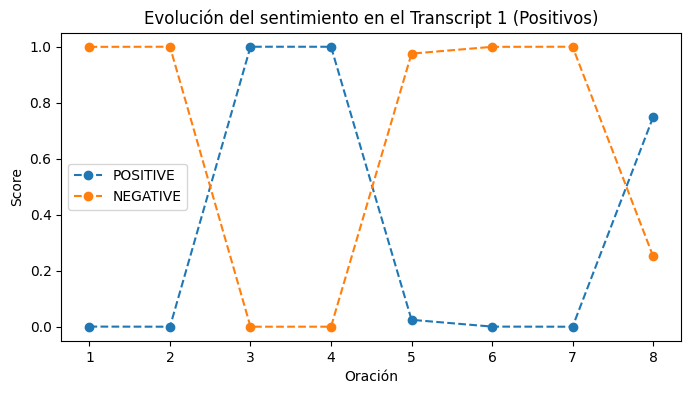

c:\Users\54113\anaconda3\envs\USAL_EDA\Lib\site-packages\transformers\pipelines\text_classification.py:105: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


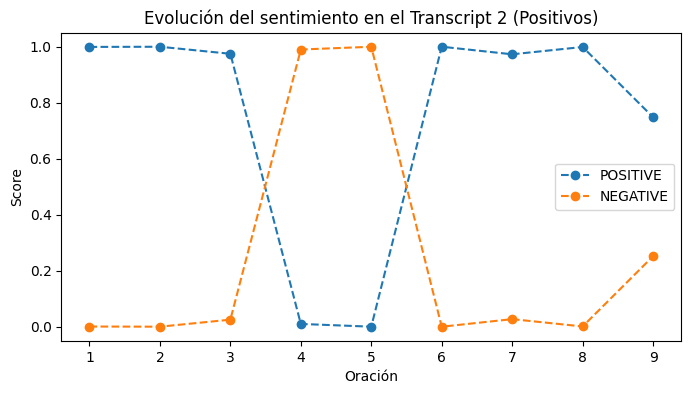

c:\Users\54113\anaconda3\envs\USAL_EDA\Lib\site-packages\transformers\pipelines\text_classification.py:105: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


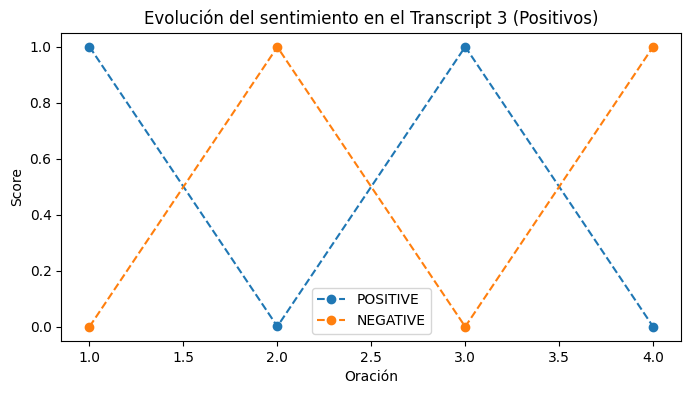

c:\Users\54113\anaconda3\envs\USAL_EDA\Lib\site-packages\transformers\pipelines\text_classification.py:105: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


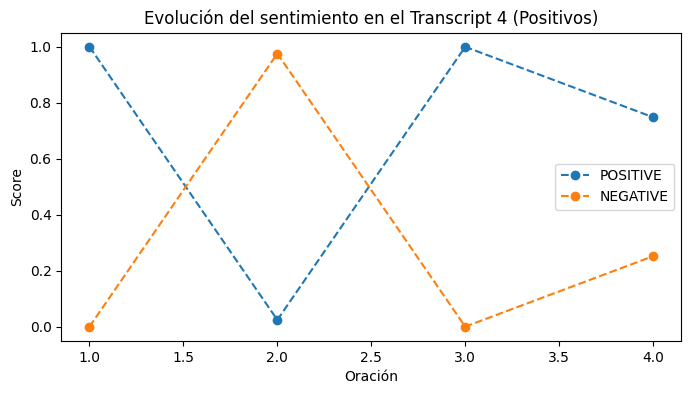

c:\Users\54113\anaconda3\envs\USAL_EDA\Lib\site-packages\transformers\pipelines\text_classification.py:105: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


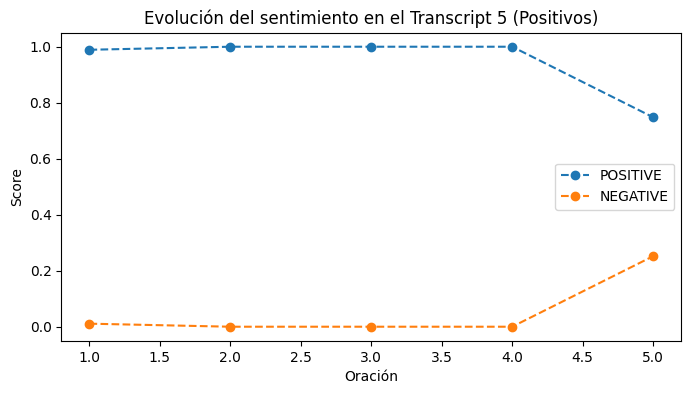

c:\Users\54113\anaconda3\envs\USAL_EDA\Lib\site-packages\transformers\pipelines\text_classification.py:105: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


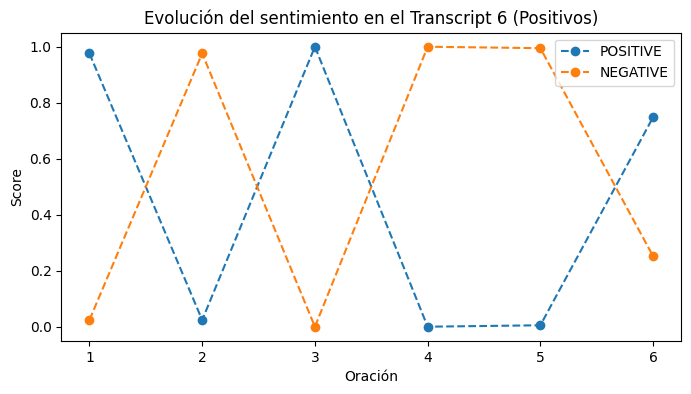

c:\Users\54113\anaconda3\envs\USAL_EDA\Lib\site-packages\transformers\pipelines\text_classification.py:105: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


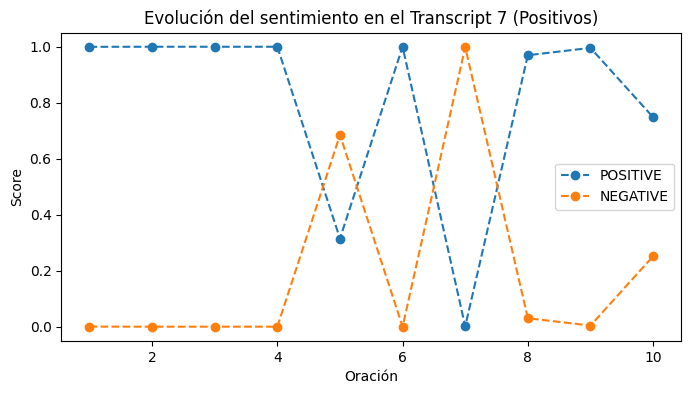

In [ ]:
# %% Análisis y gráficas para los transcripts positivos

df_positive = analyze_transcripts_by_sentences(positive_transcripts, 
                                               sentiment_pipeline, 
                                               title="(Positivos)")

c:\Users\54113\anaconda3\envs\USAL_EDA\Lib\site-packages\transformers\pipelines\text_classification.py:105: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


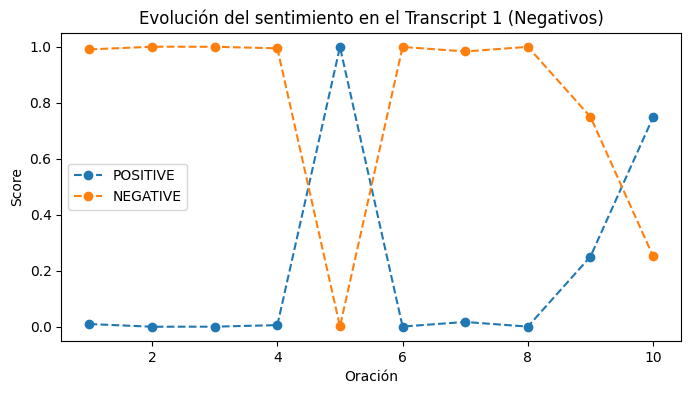

c:\Users\54113\anaconda3\envs\USAL_EDA\Lib\site-packages\transformers\pipelines\text_classification.py:105: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


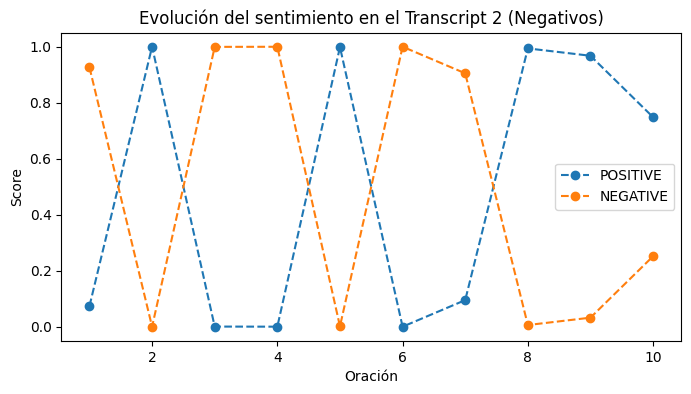

c:\Users\54113\anaconda3\envs\USAL_EDA\Lib\site-packages\transformers\pipelines\text_classification.py:105: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


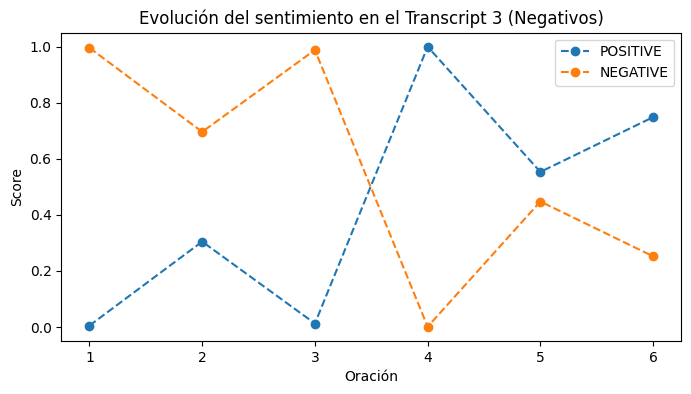

c:\Users\54113\anaconda3\envs\USAL_EDA\Lib\site-packages\transformers\pipelines\text_classification.py:105: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


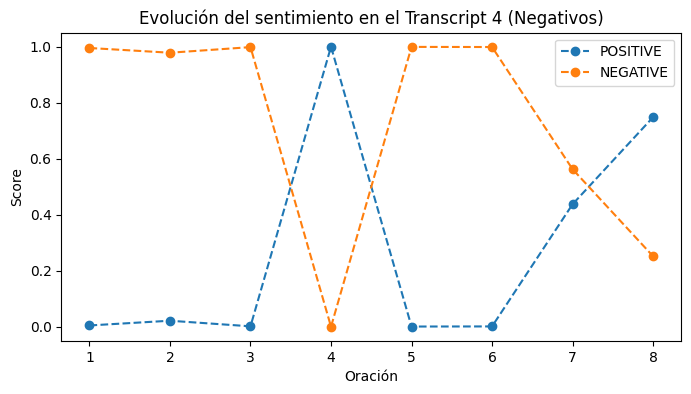

c:\Users\54113\anaconda3\envs\USAL_EDA\Lib\site-packages\transformers\pipelines\text_classification.py:105: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


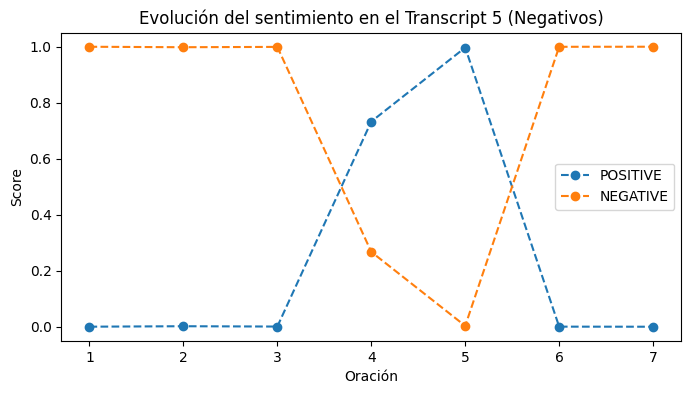

c:\Users\54113\anaconda3\envs\USAL_EDA\Lib\site-packages\transformers\pipelines\text_classification.py:105: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


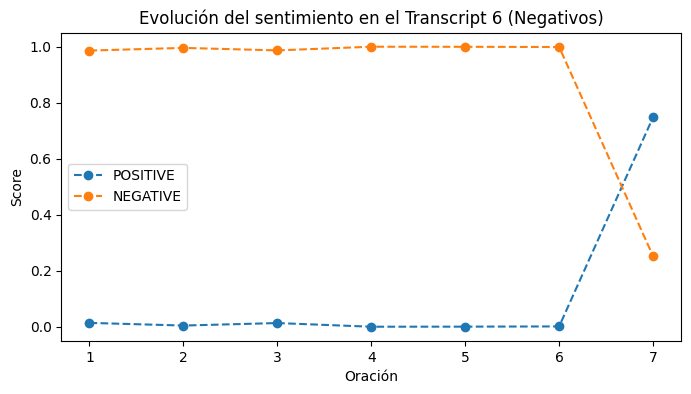

c:\Users\54113\anaconda3\envs\USAL_EDA\Lib\site-packages\transformers\pipelines\text_classification.py:105: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


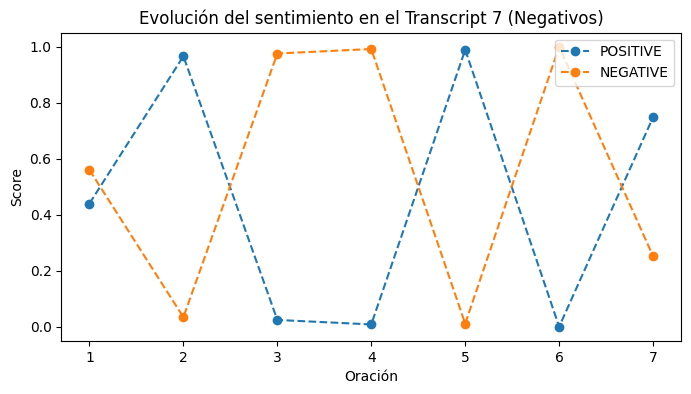

In [ ]:
# %% Análisis y gráficas para los transcripts negativos

df_negative = analyze_transcripts_by_sentences(negative_transcripts, 
                                               sentiment_pipeline, 
                                               title="(Negativos)")

In [ ]:
# %% Ver df resultante

print("=== DataFrame de Transcripts Positivos ===")
print(df_positive.head())

print("\n=== DataFrame de Transcripts Negativos ===")
print(df_negative.head())

=== DataFrame de Transcripts Positivos ===
   sentiment_NEGATIVE  sentiment_POSITIVE  transcript_id  \
0            0.999340            0.000660              1   
1            0.999776            0.000224              1   
2            0.000215            0.999785              1   
3            0.000347            0.999653              1   
4            0.975170            0.024830              1   

                                            sentence  sentence_id  
0  Well, at the beginning there is a scene where ...            1  
1    I get bored because nothing interesting happens            2  
2   Then the baby giraffe and the adult giraffe a...            3  
3   The same happens when other animals like the ...            4  
4   At the end, the camera goes back underwater a...            5  

=== DataFrame de Transcripts Negativos ===
   sentiment_NEGATIVE  sentiment_POSITIVE  transcript_id  \
0            0.990208            0.009792              1   
1            0.999816   